In [2]:
import os
import sys
sys.path.insert(0, os.path.abspath('../..'))
from dataset import ZtfDataSet,DataSet
import pandas as pd
import utils
import numpy as np
from matplotlib import pyplot as plt
import torch
np.random.seed(2) 
torch.manual_seed(2)

In [8]:
folder = '../../datasets/ZTF_rm'
min_length=2
sep=','
start_col=1
lcs = ZtfDataSet(folder)
lcs.files_to_df()
lcs.read(sep=sep)
lcs.prune(min_length=min_length, start_col=start_col, keep_missing=True)    

found 9 for band='r'
found 10 for band='i'
found 10 for band='g'


In [9]:
lcs.valid_files_df

,r,i,g
MCG+08-11-011,../../datasets/ZTF_rm/r/MCG+08-11-011_DR_rband...,../../datasets/ZTF_rm/i/MCG+08-11-011_DR_iband...,../../datasets/ZTF_rm/g/MCG+08-11-011_DR_gband...
3C273,../../datasets/ZTF_rm/r/3C273_DR_rband.csv,../../datasets/ZTF_rm/i/3C273_DR_iband.csv,../../datasets/ZTF_rm/g/3C273_DR_gband.csv
NGC2617,../../datasets/ZTF_rm/r/NGC2617_DR_rband.csv,../../datasets/ZTF_rm/i/NGC2617_DR_iband.csv,../../datasets/ZTF_rm/g/NGC2617_DR_gband.csv
3C120,../../datasets/ZTF_rm/r/3C120_DR_rband.csv,../../datasets/ZTF_rm/i/3C120_DR_iband.csv,../../datasets/ZTF_rm/g/3C120_DR_gband.csv
NGC5548,../../datasets/ZTF_rm/r/NGC5548_DR_rband.csv,../../datasets/ZTF_rm/i/NGC5548_DR_iband.csv,../../datasets/ZTF_rm/g/NGC5548_DR_gband.csv
Mrk876,../../datasets/ZTF_rm/r/Mrk876_DR_rband.csv,../../datasets/ZTF_rm/i/Mrk876_DR_iband.csv,../../datasets/ZTF_rm/g/Mrk876_DR_gband.csv
H2106-099,../../datasets/ZTF_rm/r/H2106-099_DR_rband.csv,../../datasets/ZTF_rm/i/H2106-099_DR_iband.csv,../../datasets/ZTF_rm/g/H2106-099_DR_gband.csv
Mrk142,../../datasets/ZTF_rm/r/Mrk142_DR_rband.csv,../../datasets/ZTF_rm/i/Mrk142_DR_iband.csv,../../datasets/ZTF_rm/g/Mrk142_DR_gband.csv
Mrk817,../../datasets/ZTF_rm/r/Mrk817_DR_rband.csv,../../datasets/ZTF_rm/i/Mrk817_DR_iband.csv,../../datasets/ZTF_rm/g/Mrk817_DR_gband.csv


In [188]:
order = [2,0,1]
cs = ['blue','green','orange']
plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['ytick.labelsize'] = 20
def split_plt_save(lcs, obj='3C273', dt_sig_thres=[3,3,3],xlim=None, save=False):
    fig, ax = plt.subplots(3,1, figsize=(40,12),sharex=True)
    #fig.suptitle.s(obj)
    ax[0].set_title(obj, fontsize=50)
    fig.subplots_adjust(hspace=0)
    for i, object_lcs in enumerate(lcs.dataset):
        for j, lc in enumerate([object_lcs[i] for i in order]):
            dt = lc[1:,0] - lc[:-1,0]
            dt_std = np.std(dt)
            dt_mean = np.mean(dt)
            seps = np.where(dt > (dt_mean + dt_std*dt_sig_thres[j]))[0] + 1
            segs = np.split(lc, seps)
            if lcs.valid_files_df.index[i] == obj:
                
                #ax[j].scatter(lc[:,0], lc[:,1], label='observed points',c=cs[j])
                ax[j].errorbar(lc[:,0], lc[:,1], yerr=lc[:,2], fmt='.',label='observed points',c=cs[j])
                #ax[j].xlabel()
                ax[j].set_xlim(xlim)
                ax[j].set_ylabel(lcs.bands[order[j]], fontsize=30)
                for k,sep in enumerate(seps):
                    ax[j].text(((lc[sep-1, 0] + lc[sep,0])/2) -30 ,ax[j].get_ylim()[0] + (ax[j].get_ylim()[1] - ax[j].get_ylim()[0])/10,f'{k}', fontsize=30)
                    ax[j].axvline(x=(lc[sep-1, 0] + lc[sep,0])/2, linestyle=':', label='epoch separation')
                seps +=1
                
                try:
                    ax[j].text(lc[seps[-1], 0] -30 , ax[j].get_ylim()[0] + (ax[j].get_ylim()[1] - ax[j].get_ylim()[0])/10 , f'{k+1}',fontsize=30)
                except:
                    if lc.any(): ax[j].text((ax[j].get_xlim()[0] + ax[j].get_xlim()[1])/2, ax[j].get_ylim()[0] + (ax[j].get_ylim()[1] - ax[j].get_ylim()[0])/10 , f'{0}',fontsize=30)
                    
                #segments = np.split(lc, seps)
                if save:
                    for k,seg in enumerate(segs):
                        folder =f'../../datasets/ZTF_rm_segments/{lcs.valid_files_df.index[i]}/epoch{k}/'
                        #folder = f'../../datasets/ZTF_rm_segments/{lcs.valid_files_df.index[i]}/{lcs.bands[j]}'
                        if not os.path.isdir(folder):
                            os.makedirs(folder)

                        #fn = f'{lcs.valid_files_df.index[i]}--{k}_{lcs.bands[j]}.dat'
                        fn = f'{lcs.valid_files_df.index[i]}_{lcs.bands[order[j]]}.dat'
                        fp = os.path.join(folder, fn)
                        np.savetxt(fp, seg)

    plt.savefig(f'../img/epochsep/{obj}')

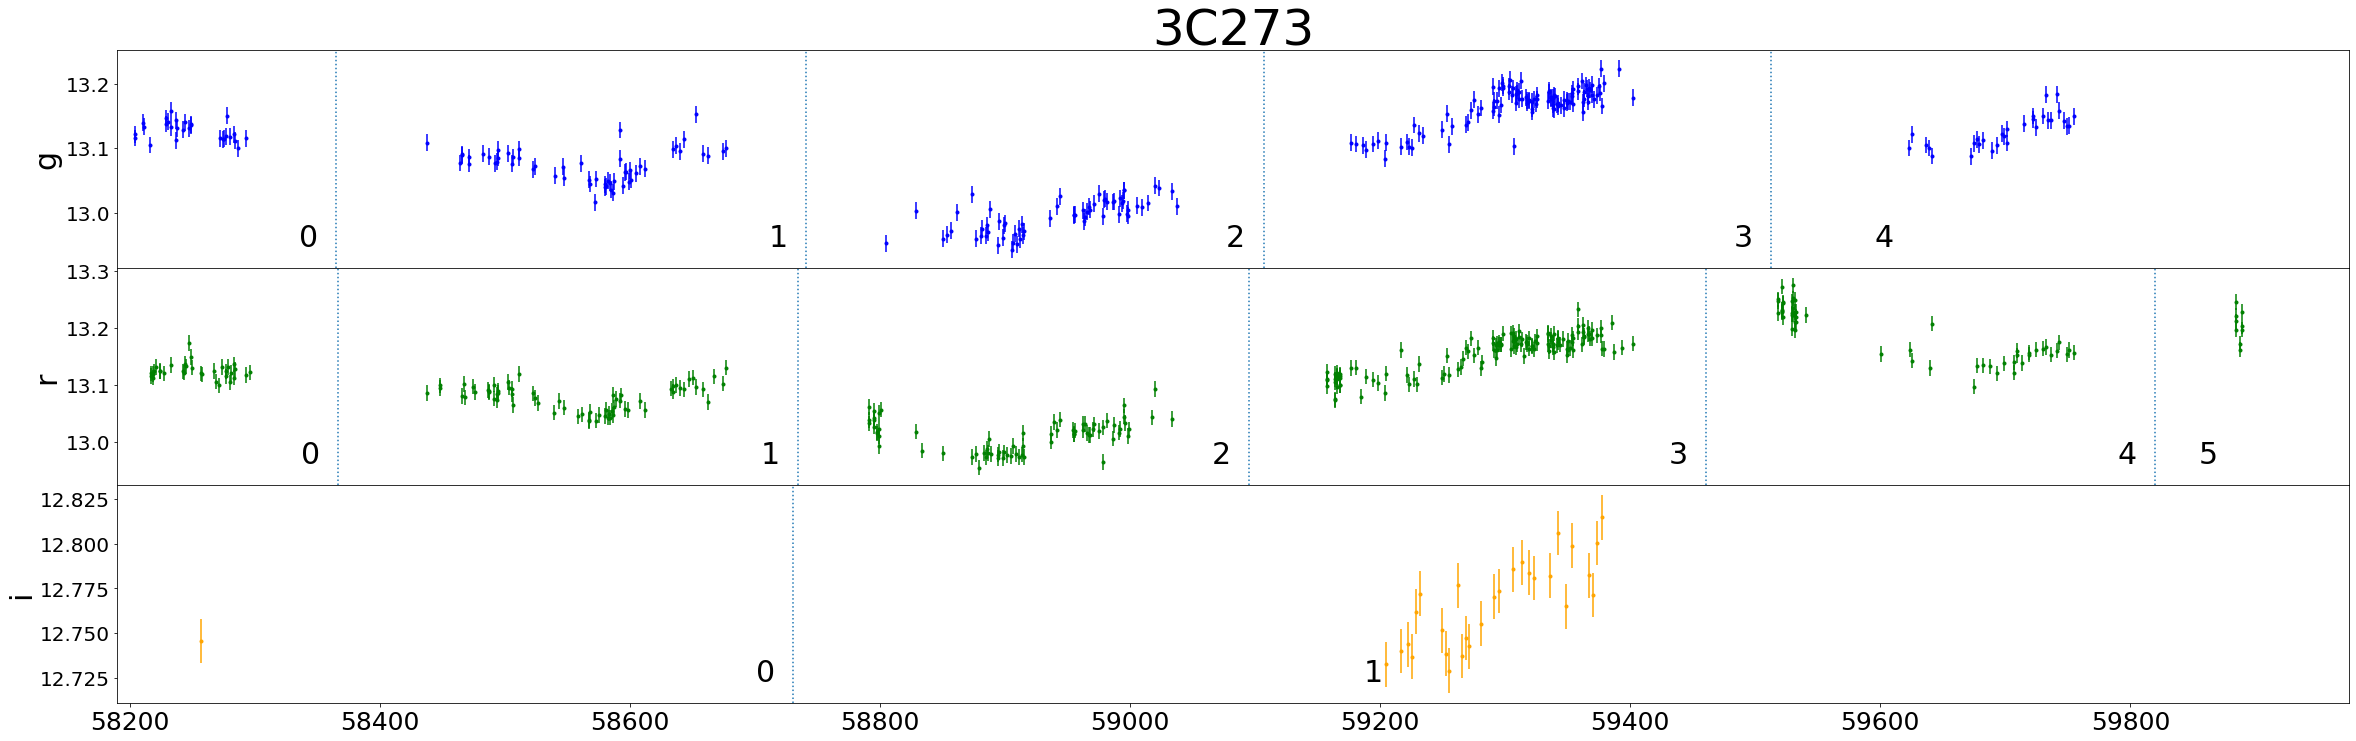

In [165]:
# # use 0,1,2,3
# split_plt_save(lcs, obj='3C273',dt_sig_thres=[3,5,3],xlim=(58190, 59975))

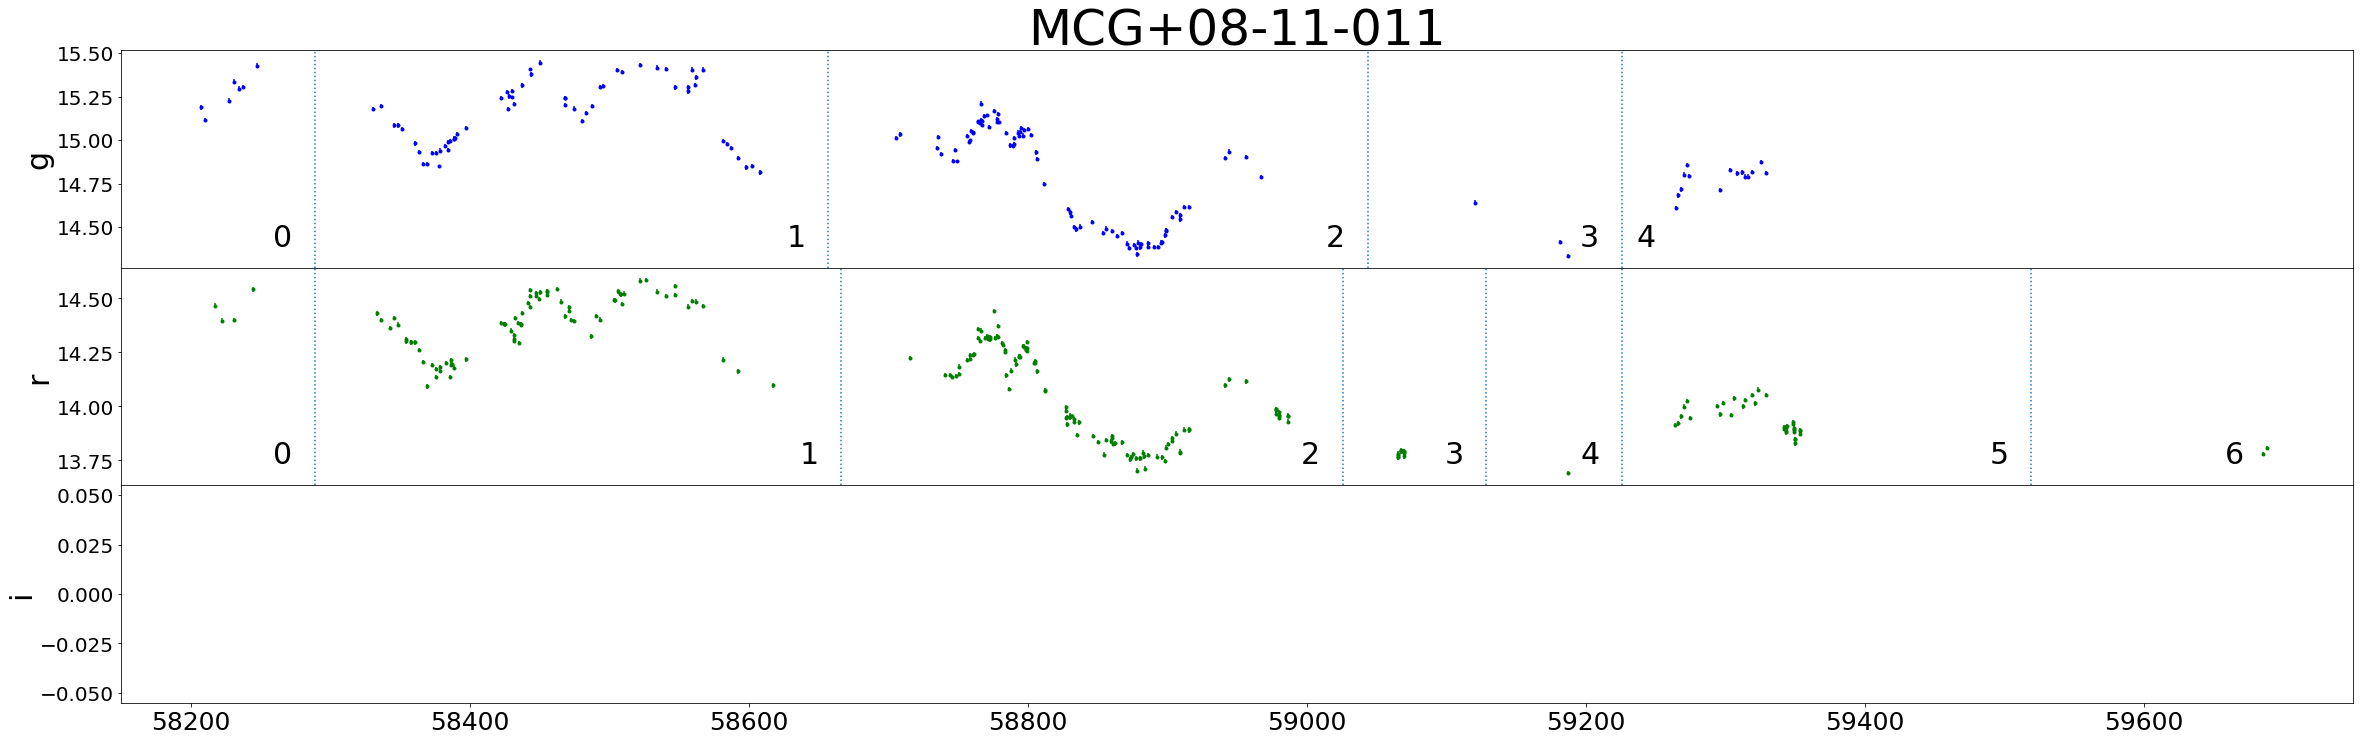

In [175]:
split_plt_save(lcs, obj='MCG+08-11-011',dt_sig_thres=[4,2.5,1], xlim=(58150,59750))


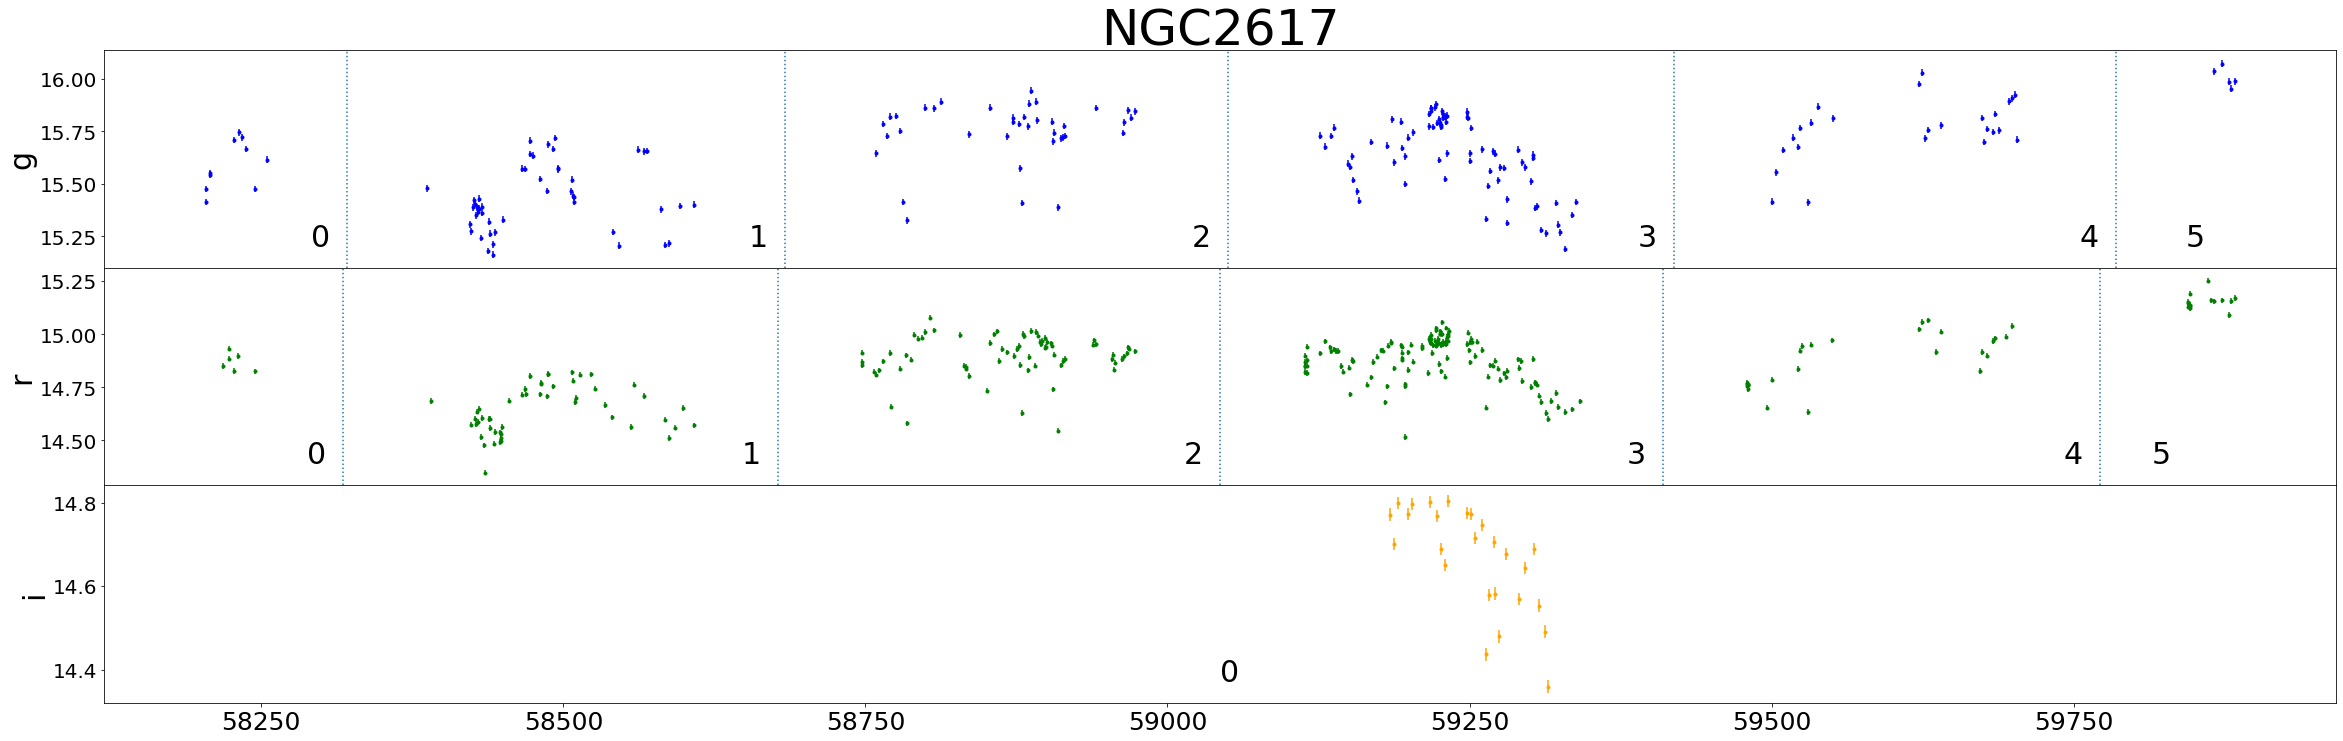

In [189]:
split_plt_save(lcs, obj='NGC2617', dt_sig_thres=[4,4,3])

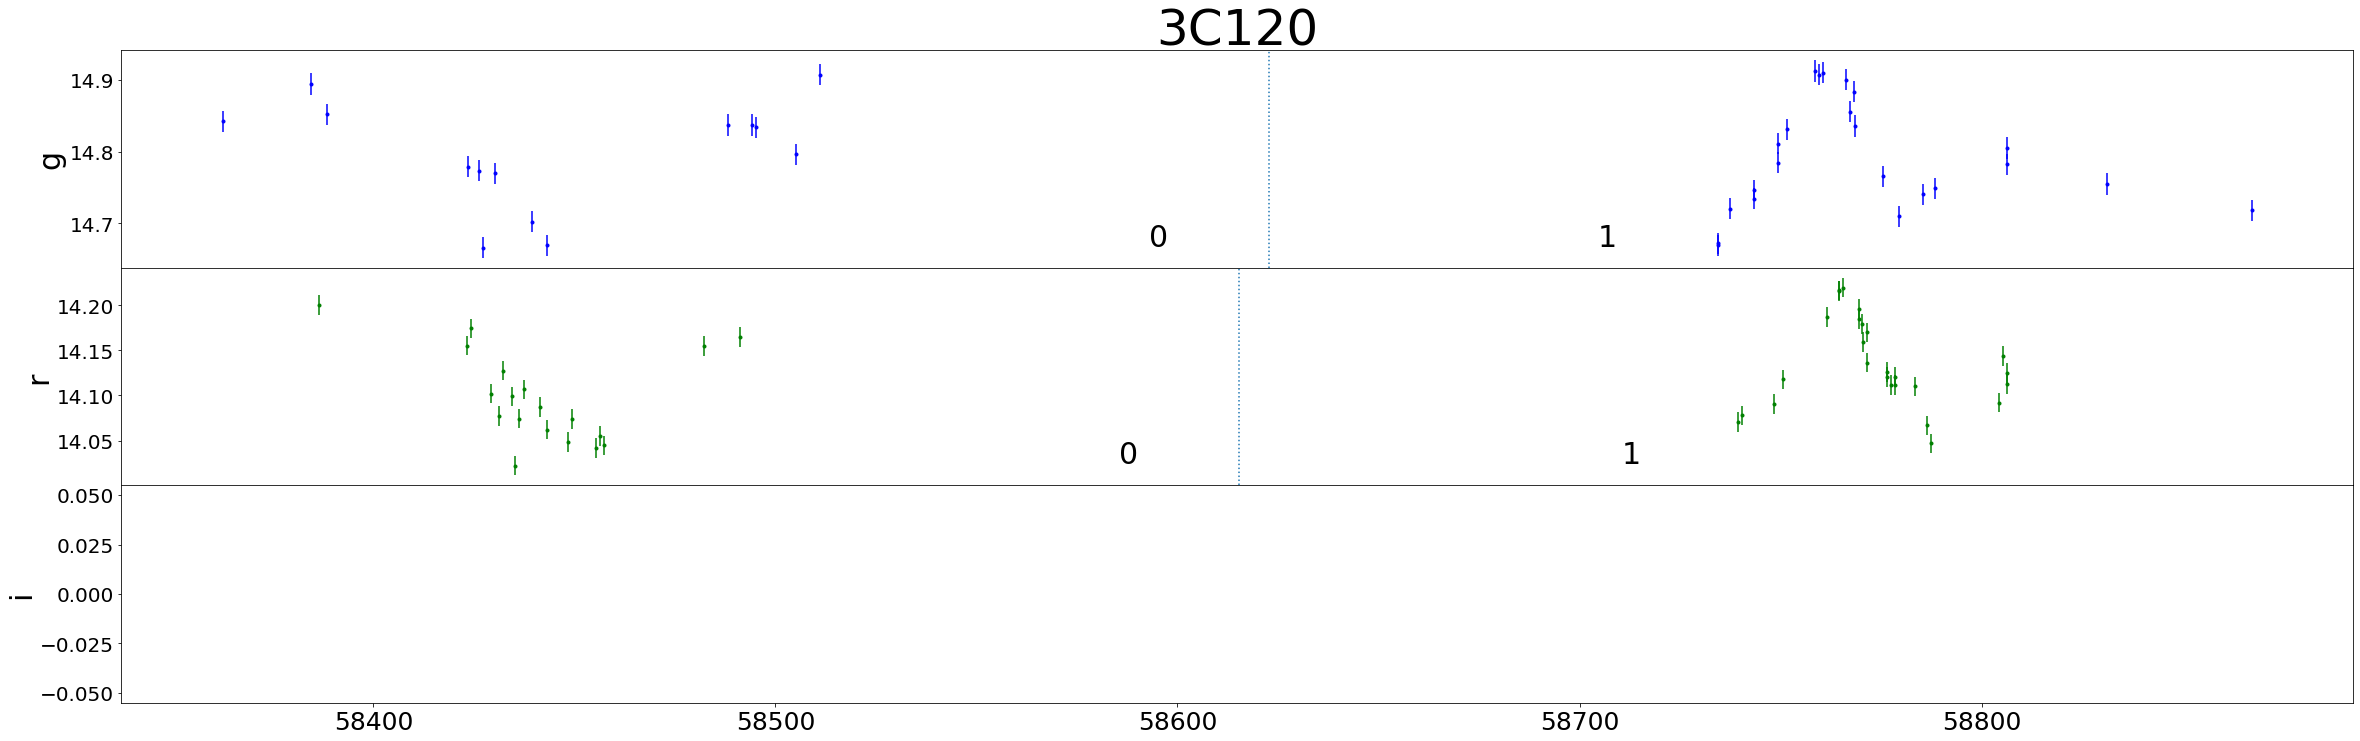

In [191]:
split_plt_save(lcs, obj='3C120',dt_sig_thres=[0.9,3,1],xlim=None)

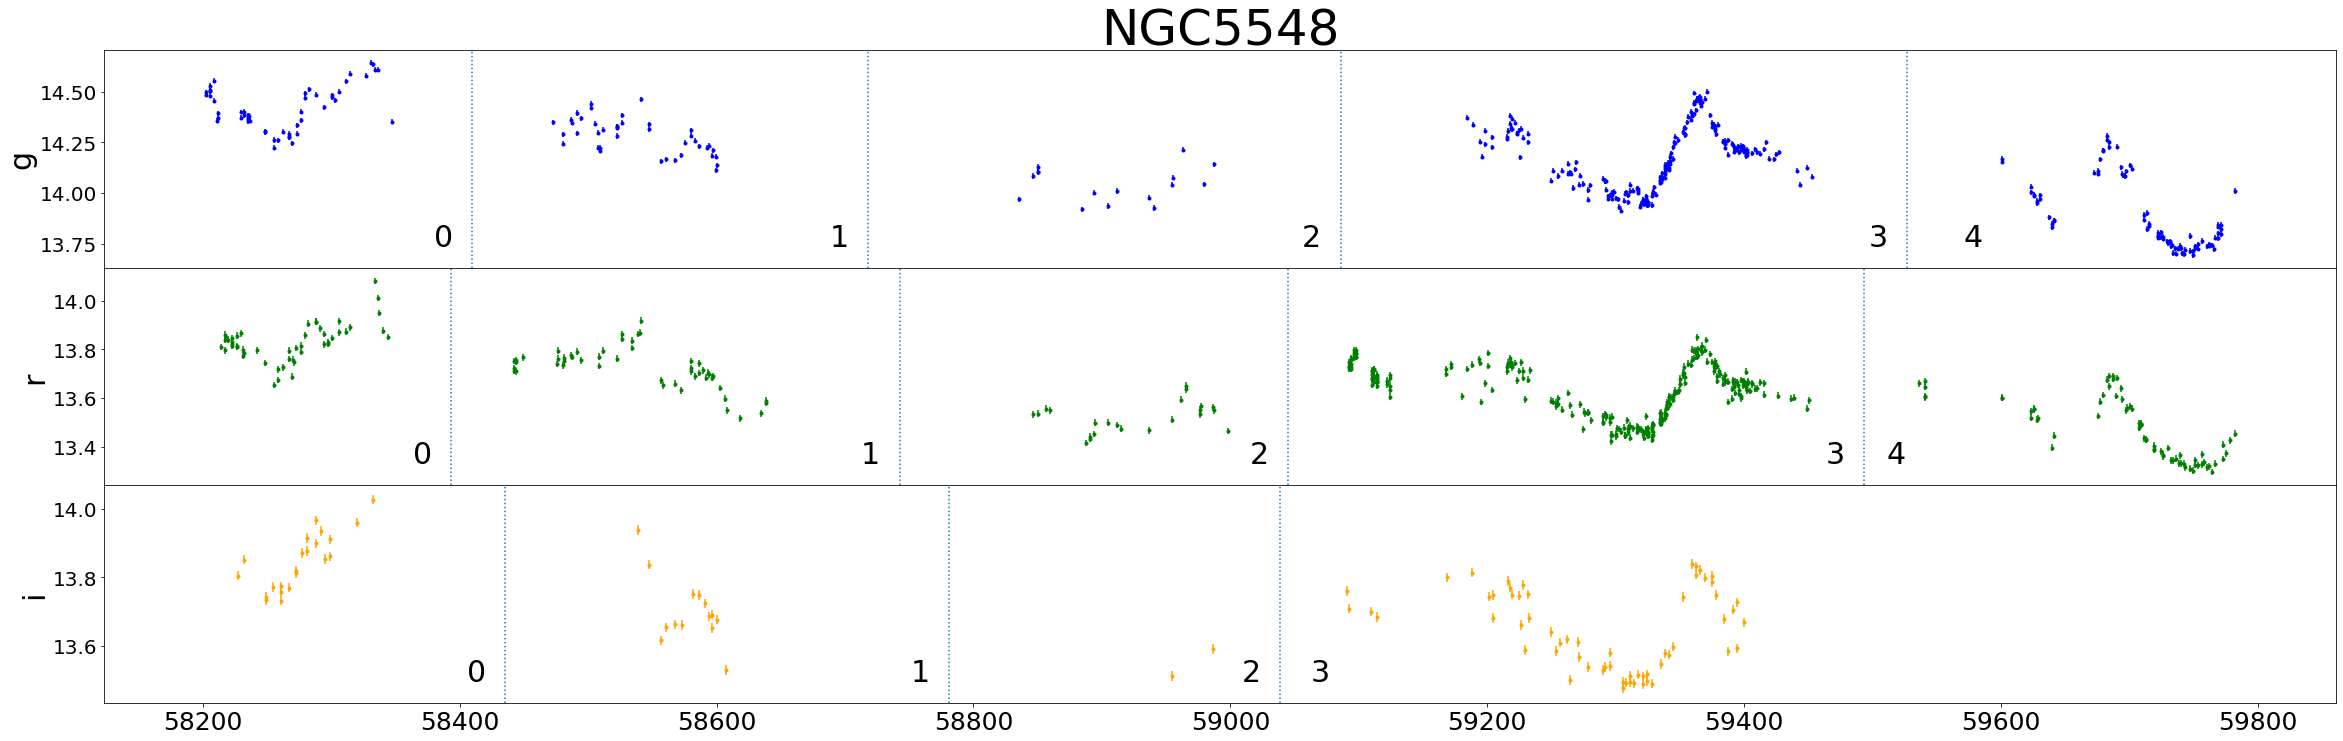

In [192]:
split_plt_save(lcs, obj='NGC5548',dt_sig_thres=[4,5,2], save=True)

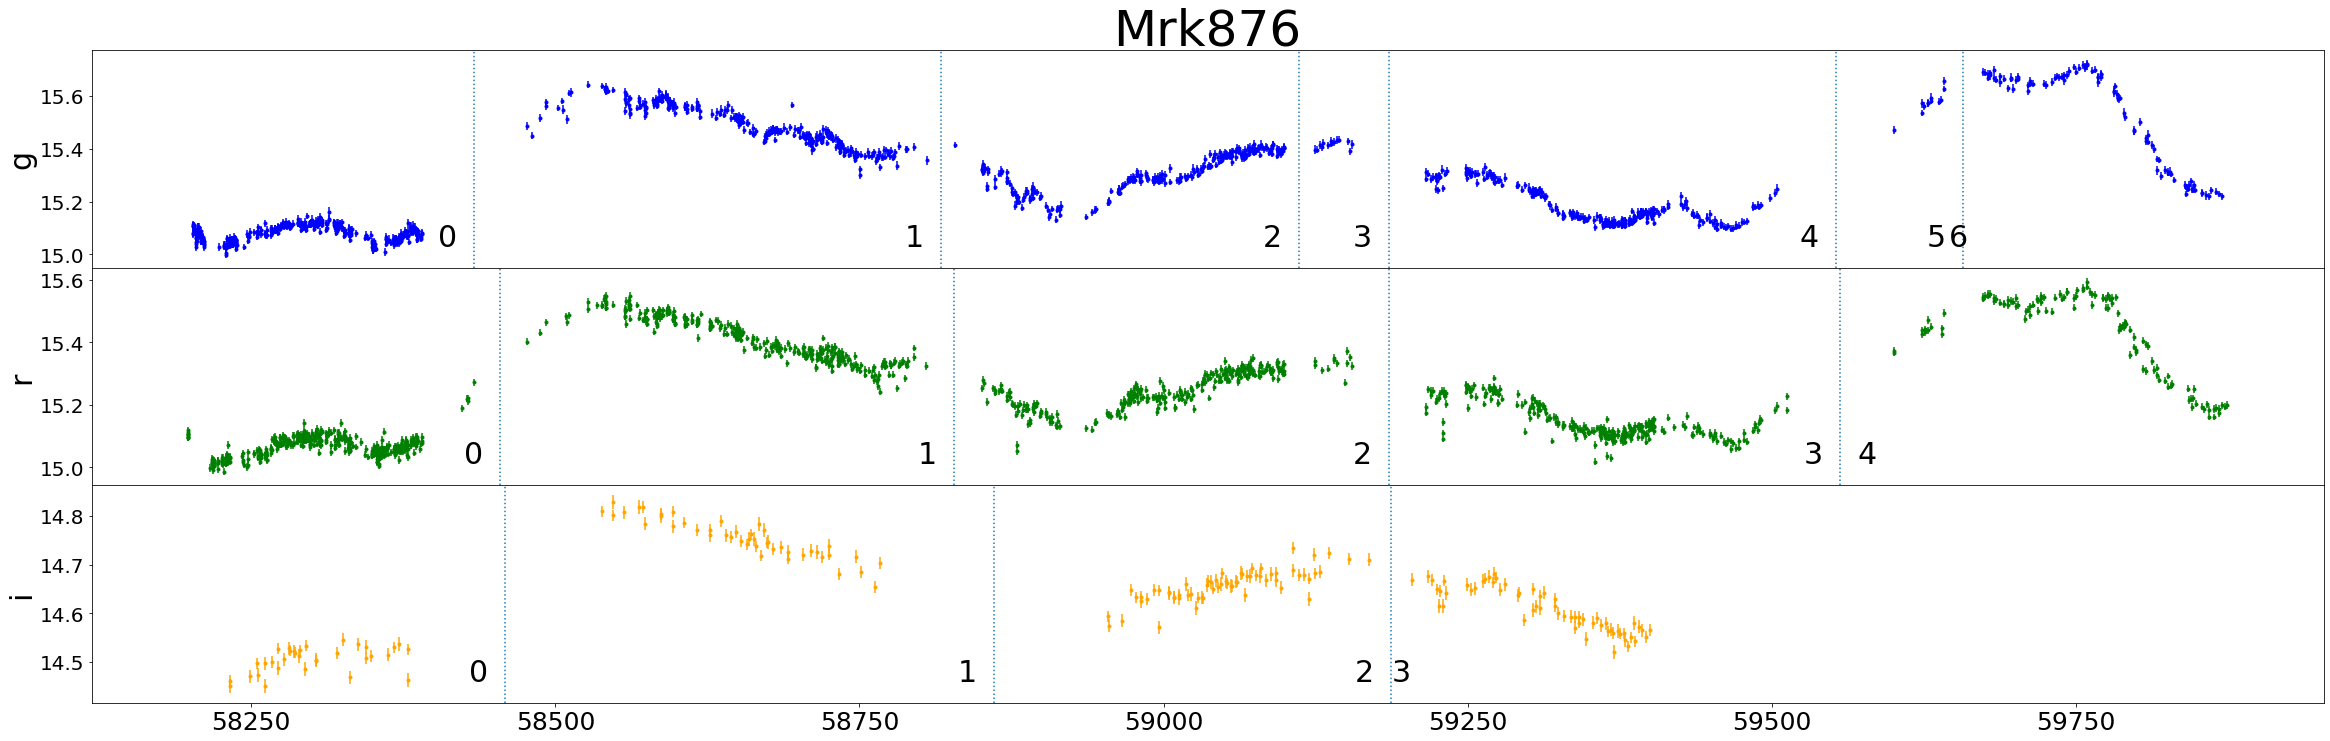

In [201]:
split_plt_save(lcs, obj='Mrk876',dt_sig_thres=[4.90,9,1])
#0
#1
#23,2,2
#4,3,3
#56,4,_

## hold off on....

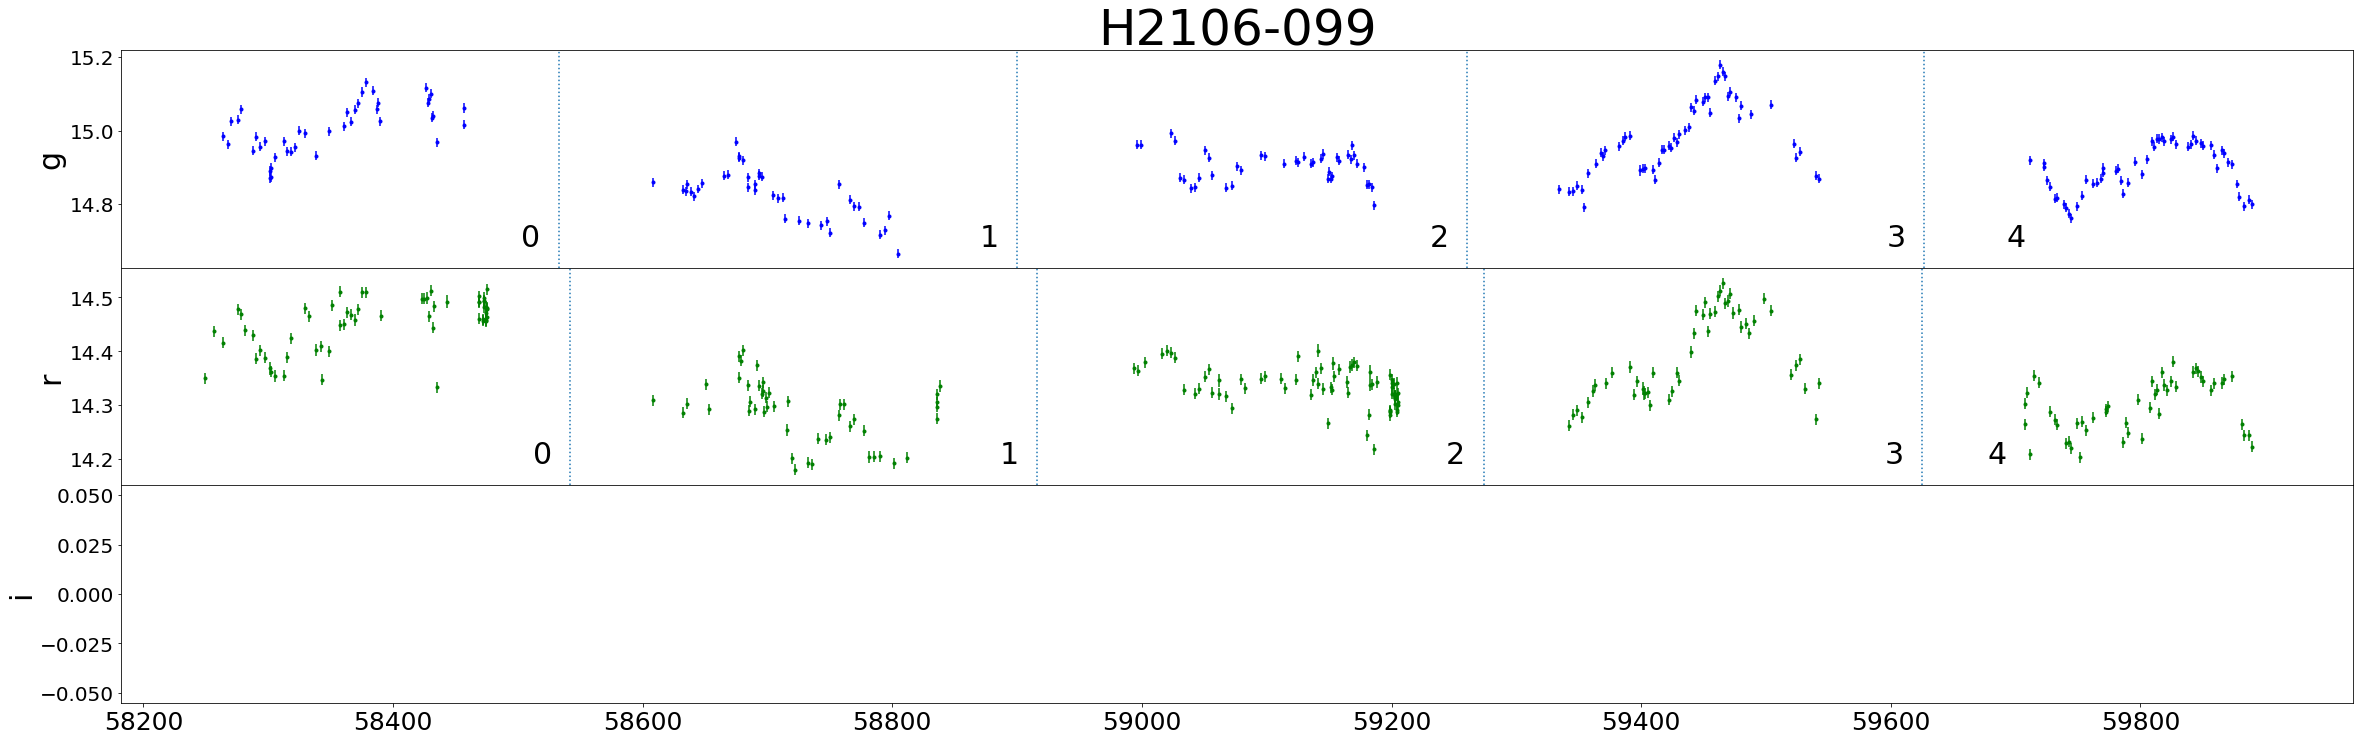

In [203]:
split_plt_save(lcs, obj='H2106-099',dt_sig_thres=[3,3,3],save=True)

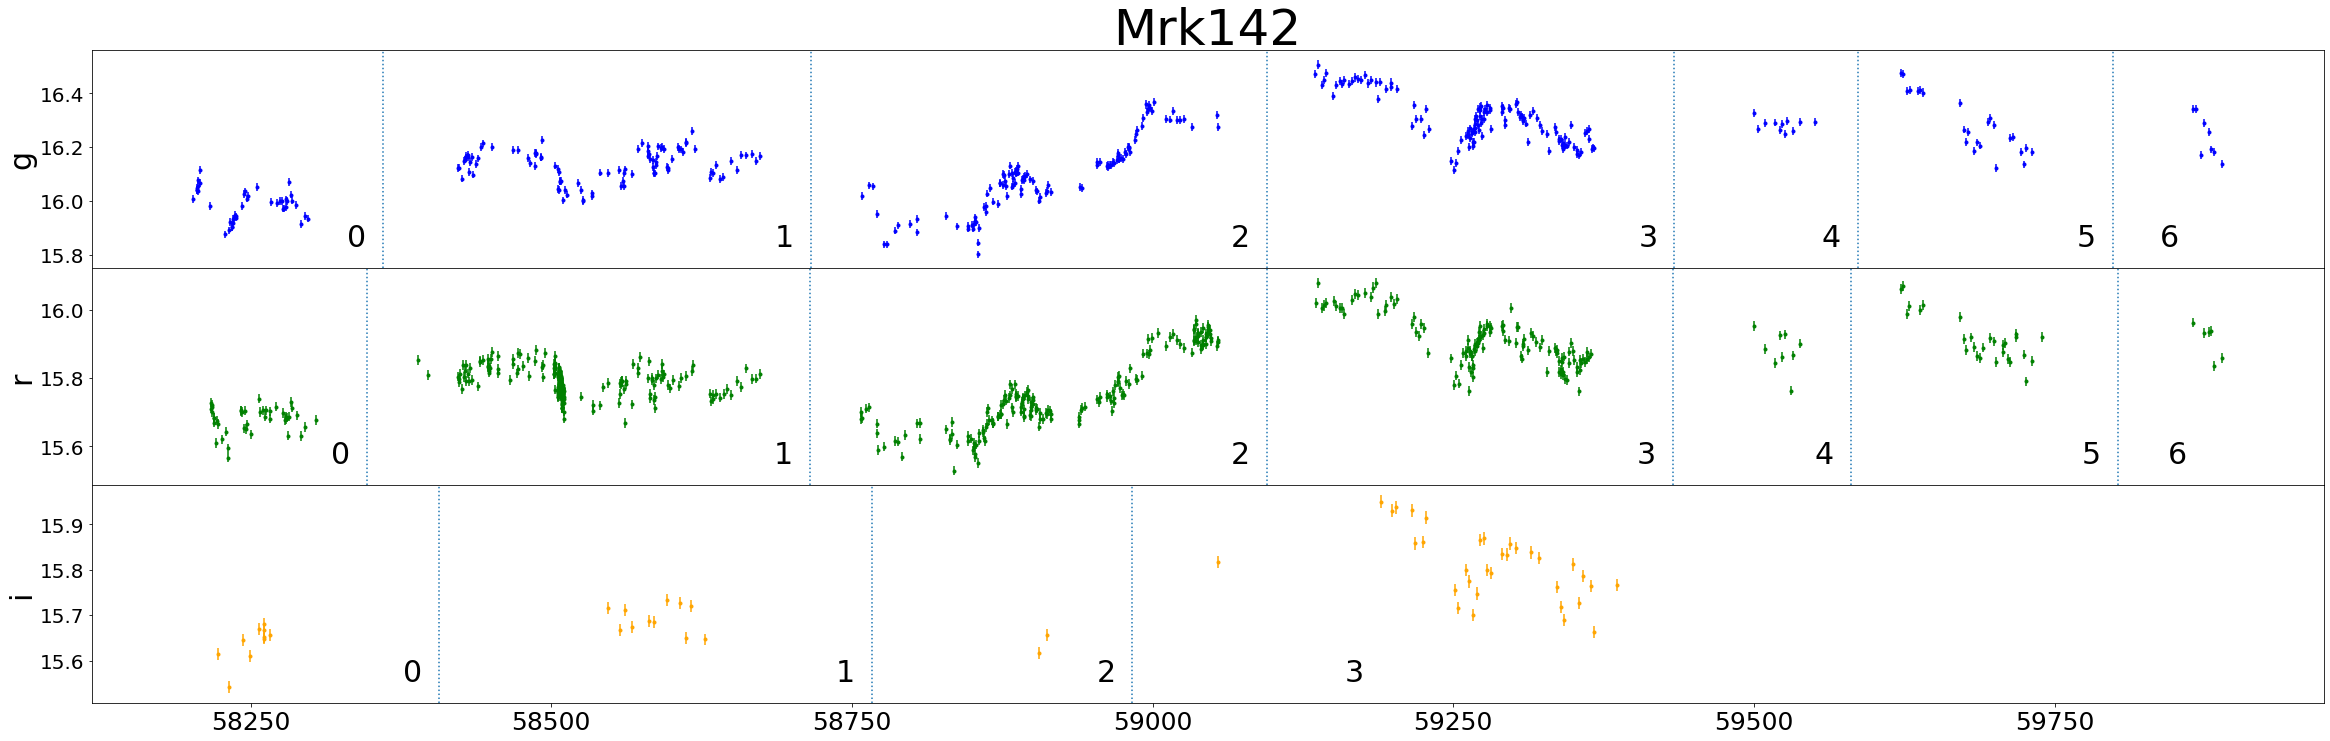

In [204]:
split_plt_save(lcs, obj='Mrk142',dt_sig_thres=[3,3,2.1], save=True)

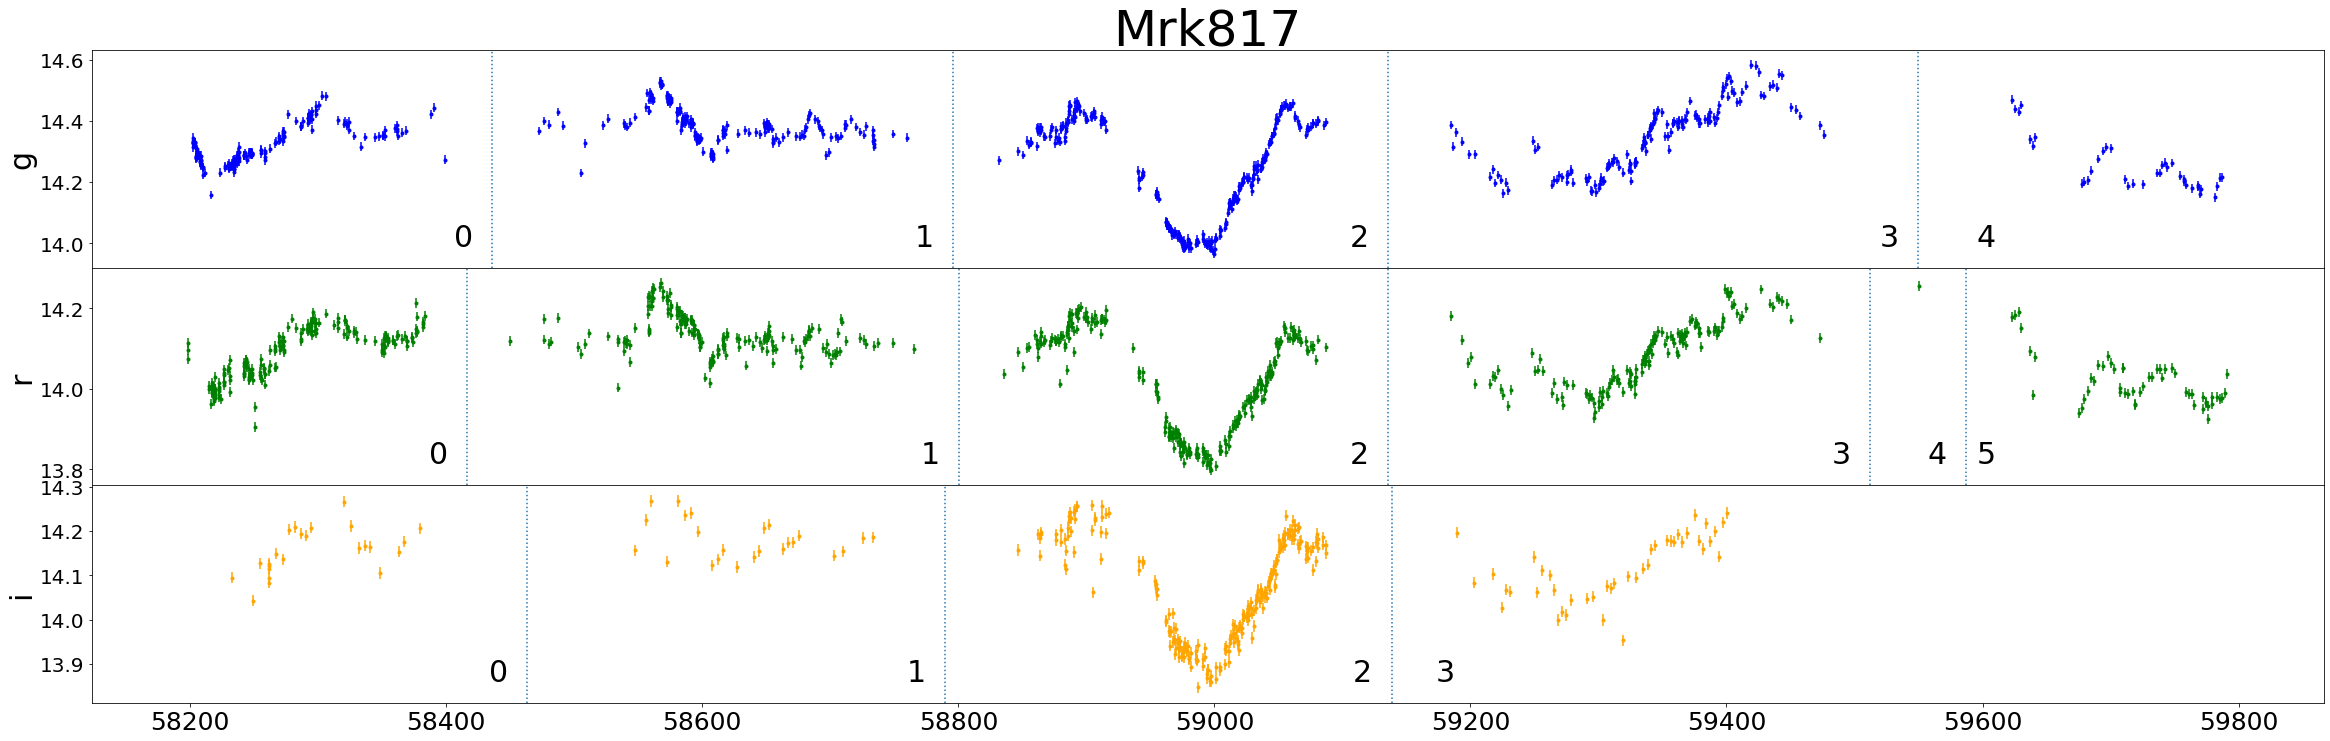

In [213]:
split_plt_save(lcs, obj='Mrk817',dt_sig_thres=[5,9,5], save=True)

In [ ]:
# save them as new files ... !!!

In [12]:
lcs_seg = utils.get_data('../../datasets/ZTF_rm')

/Users/mattlowery/Desktop/Desko/code/astro/hetast/src/notebooks/misc


In [18]:
utils.get_data( '../../datasets/ZTF_rm_segments/', sep=' ', start_col=0)

validated 44 files out of 44 for band='r'
validated 15 files out of 15 for band='i'
validated 44 files out of 44 for band='g'


IndexError: too many indices for array: array is 1-dimensional, but 4 were indexed

In [58]:
%load_ext autoreload
%autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
